In [275]:
#data wrangle
import pandas as pd
import numpy as np
from datetime import datetime

#visuals
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### reading in busfareactivity for ridership analysis

In [276]:
df = pd.read_excel('../resource_files/BusFareBoxActivity_2020.csv')

#### only looking at the ridership values

In [286]:
subset = df[['ServiceDateTime','Ridership']]
subset.head()

,ServiceDateTime,Ridership
0,2017-01-01,1244
1,2017-01-01,689
2,2017-01-01,1377
3,2017-01-01,474
4,2017-01-01,471


In [287]:
#change dates to actual datetime
subset.ServiceDateTime = pd.to_datetime(subset.ServiceDateTime)

In [288]:
#sum the ridership values up by day, as they are currently separated by route
subset = subset.groupby('ServiceDateTime').sum().reset_index()

In [289]:
subset.head()

,ServiceDateTime,Ridership
0,2017-01-01,45688
1,2017-01-02,74183
2,2017-01-03,110745
3,2017-01-04,98050
4,2017-01-05,104121


In [290]:
subset [subset.ServiceDateTime >= '2020-01-01']

,ServiceDateTime,Ridership
969,2020-01-01,36344
970,2020-01-02,48966
971,2020-01-03,54831
972,2020-01-04,38089
973,2020-01-05,52850
974,2020-01-06,90589
975,2020-01-07,90244
976,2020-01-08,79903
977,2020-01-09,146


> theres only 9 days of 2020 service. removing these values

In [291]:
subset = subset [subset.ServiceDateTime < '2020-01-01']
subset.tail()

,ServiceDateTime,Ridership
964,2019-12-27,79955
965,2019-12-28,58148
966,2019-12-29,49913
967,2019-12-30,78112
968,2019-12-31,77726


In [292]:
#adding in day and year for analyzing
subset['Day'] = subset.ServiceDateTime.dt.strftime('%a')
subset['Year'] = subset.ServiceDateTime.dt.strftime('%Y')

In [294]:
subset.head()

,ServiceDateTime,Ridership,Day,Year
0,2017-01-01,45688,Sun,2017
1,2017-01-02,74183,Mon,2017
2,2017-01-03,110745,Tue,2017
3,2017-01-04,98050,Wed,2017
4,2017-01-05,104121,Thu,2017


#### whats the average ridership by day and how does that vary by year? values listed in thousands

In [295]:
df_day = pd.pivot_table(subset, index='Year', columns = 'Day', values='Ridership', aggfunc='mean')
df_day = df_day[['Sun','Mon','Tue','Wed','Thu','Fri','Sat']]
df_day = round(df_day/1000,1)
df_day

Day,Sun,Mon,Tue,Wed,Thu,Fri,Sat
Year,,,,,,,
2017,53.9,97.7,101.3,102.5,101.5,101.8,72.6
2018,54.0,93.7,96.7,97.9,98.7,98.2,72.8
2019,51.7,91.1,94.6,93.9,93.6,94.2,69.1


#### looking at average ridership by day, regardless of year

In [299]:
cats = [ 'Sun','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
avg_rider = subset.groupby('Day').mean().reindex(cats)
avg_rider

,Ridership
Day,
Sun,53387.834532
Mon,94566.129496
Tue,97895.114286
Wed,98681.333333
Thu,98527.586957
Fri,98566.434783
Sat,71819.036496


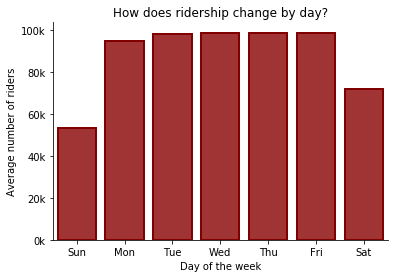

In [302]:
fig = plt.figure()

ax = sns.barplot(avg_rider.index, avg_rider.Ridership, color='firebrick', edgecolor='maroon', linewidth=2)

ax.set(xlabel='Day of the week', ylabel='Average number of riders', title='How does ridership change by day?')

y_value=['{:.0f}'.format(x/1000) + 'k' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()
fig.savefig('riderbyday.png', transparent=True)

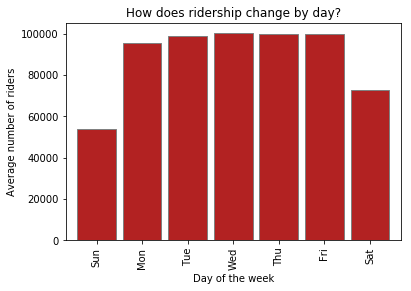

In [120]:
subset.groupby('Day').mean().reindex(cats).plot.bar(color='firebrick', width = .85, edgecolor='gray',
                                                    legend=None)
plt.ylabel('Average number of riders')
plt.xlabel('Day of the week')
plt.title('How does ridership change by day?')
plt.show()